[('like', 4987), ('feel', 4424), ('know', 2827), ('want', 2411), ('bpd', 2398), ('people', 2395), ('time', 2373), ('get', 2277), ('thing', 2057), ('really', 1807), ('even', 1791), ('one', 1742), ('life', 1678), ('friend', 1573), ('feeling', 1554), ('make', 1500), ('think', 1427), ('would', 1399), ('day', 1391), ('anyone', 1330)]
ealth service trying make music make want kill every time verge breaking point
 sex every time get argument partner want break overdoing leave 99 sure fuckin
n partner bd married people randomly want get divorce want know like bpd let t
ied people randomly want get divorce want know like bpd let tell stop ruminati
 wish could find true love feel like want also idk fit anywhere want kill make
feel like want also idk fit anywhere want kill make biggest fuck u life everyo
on get better feel socially isolated want see others relate experience guilt p
omething anyone made mistake driving want kill anyone know good online therapy
diagnosed valid period im sad oh sad 

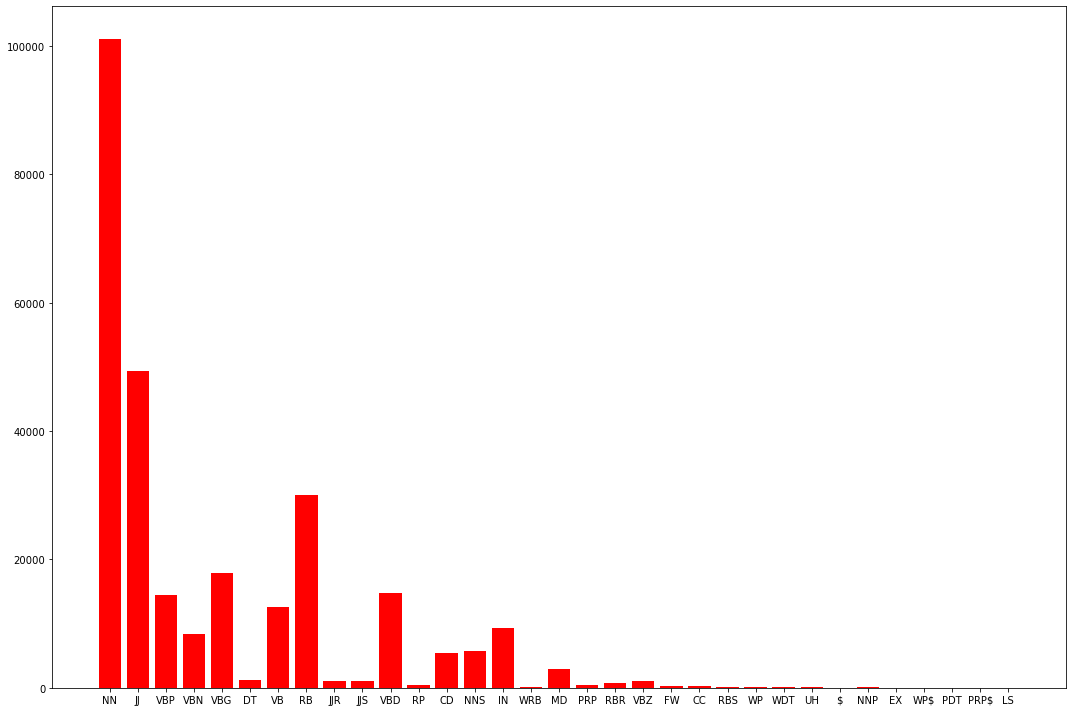

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk import FreqDist


df = pd.read_csv('r-bpd data.csv')

###tokenize title and body texts###

tokenizer = RegexpTokenizer(r'\w+')
df['title'] = df['title'].apply(lambda x: tokenizer.tokenize(x.lower()))
#had to add in .astype(str) because it would run into some float types and the .lower() will return an error
df['body'] = df['body'].astype(str).apply(lambda x: tokenizer.tokenize(x.lower()))


###remove stopwords###

#returns all words that aren't in the list of stopwords
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words
#had to use 'python -m nltk.downloader stopwords' from the TestEnv to make stopwords work
df['title'] = df['title'].apply(lambda x: remove_stopwords(x))
df['body'] = df['body'].apply(lambda x: remove_stopwords(x))


###lemmatizer -- lemmatizer maps common words back to its base###

lemmatizer = WordNetLemmatizer()

def word_lemmatizer(text):
    lem_text = [lemmatizer.lemmatize(x) for x in text]
    return lem_text
df['title'] = df['title'].apply(lambda x: word_lemmatizer(x))
df['body'] = df['body'].apply(lambda x: word_lemmatizer(x))


###storing title and body columns as a list to feed into pos_tag###
title_list = list(df['title'])
body_list = list(df['body'])


#Text classification: pos tagging
pos_tagged_title = []
pos_tagged_body = []
for ele in title_list:
    pos_tagged_title.append(nltk.pos_tag(ele))
for ele in body_list:
    pos_tagged_body.append(nltk.pos_tag(ele))
    
df['pos_tagged_title'] = pos_tagged_title
df['pos_tagged_body'] = pos_tagged_body



###The codes below analyzes text frequency distribution, collocation, and concordance while excluding certain words###
single_w = []
exclude_list = ['http', 'com', 'qualtrics', 'bgsu', 'az1', 'jfe']
for item in df['pos_tagged_title']:
    for tuples in item:
        if tuples[0] not in exclude_list:
            single_w.append(tuples[0])
            
for item in df['pos_tagged_body']:
    for tuples in item:
        if tuples[0] not in exclude_list:
            single_w.append(tuples[0])
            
fd = nltk.FreqDist(single_w)
print(fd.most_common(20))


text = nltk.Text(single_w)
concordance_list = text.concordance_list("want", lines=20)
for entry in concordance_list:
    print(entry.line)
finder = nltk.collocations.QuadgramCollocationFinder.from_words(text)
print(finder)
print(finder.ngram_fd.most_common(20))


'''creating a dictionary to store counts of unique POS tags'''
pos_list = []
for row in df['pos_tagged_body']:
    for tup in row:
        if tup[1] not in pos_list:
            pos_list.append(tup[1])
            
for row in df['pos_tagged_title']:
    for tup in row:
        if tup[1] not in pos_list:
            pos_list.append(tup[1])
            
pos_dict = {}
for item in pos_list:
    pos_dict[item] = 0
    for row in df['pos_tagged_body']:
        for tup in row:
            if tup[1] == item:
                pos_dict[item] += 1
    
    for row in df['pos_tagged_title']:
        for tup in row:
            if tup[1] == item:
                pos_dict[item] += 1
                

'''Plotting the counts'''
%matplotlib inline

fig = plt.figure(figsize=(15,10))
plt.bar(pos_dict.keys(), pos_dict.values(), color='red')
plt.tight_layout()
plt.savefig("pos_dist.png", dpi=300)
plt.show()


###getting headers###
key_list = []
for key in df.keys():
    key_list.append(key)

df.to_csv('r-bpd data cleaned.csv', index=False, header=key_list)
